In [12]:
import requests

API_KEY = "sk-XCoZZc1g4tHDcBEH3C2a9Q"
usage_url = "https://api.thucchien.ai/key/info"

usage_headers = {
  "accept": "application/json",
  "Authorization": f"Bearer {API_KEY}"
}

response = requests.get(usage_url, headers=usage_headers)

if response.status_code == 200:
    key_info = response.json()
    info = key_info['info']
    print("Key Alias:", info['key_alias'])
    print("Spend: $" + str(info['spend']))
    print("Max Budget:", info.get('max_budget', 'Unlimited'))
    print("Models:", info['models'])
    print("Created:", info['created_at'])
else:
    print("Error:", response.status_code)
    print(response.text)

Key Alias: official-47@key
Spend: $0.6732728125
Max Budget: 50.0
Models: ['all-team-models']
Created: 2025-10-21T07:12:35.722000+00:00


In [2]:
import requests
import json

AI_API_BASE = "https://api.thucchien.ai"

chat_url = f"{AI_API_BASE}/chat/completions"
chat_headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}

chat_prompt = """
Sản phẩm: Xây dựng bản “Báo cáo Hội đồng Quản trị – Techcombank 2025 Insights”  dành cho Hội đồng quản trị của Techcombank, tóm tắt kết quả hoạt động tài chính năm 2025 của Techcombank và đưa ra những khuyến nghị chiến lược, triển vọng cho năm 2026.
Định dạng sản phẩm (Chọn 1 trong 2):
Bài trình chiếu (Slides - định dạng PDF/PPTX, tối đa 10 trang).
Yêu cầu thiết kế: Sáng tạo về mặt hình ảnh (visual), trình bày chuyên nghiệp, hiện đại, dễ hiểu. Phải tối ưu cho cả việc trình chiếu trên màn hình lớn (hội trường) và đọc tài liệu tại bàn làm việc của hội đồng quản trị.
Yêu cầu về tính sáng tạo: Sản phẩm phải là sáng tạo mới hoàn toàn, đáp ứng đầy đủ yêu cầu của đề bài, tuân thủ các quy định pháp lý và chuẩn mực giáo dục. Không sao chép hoặc mô phỏng từ bất kỳ sản phẩm nào có sẵn.
Ngôn ngữ: Tiếng Việt.
Gợi ý một số nội dung cần thực hiện
Tóm tắt kết quả năm 2025
- Xác định 3–5 điểm nổi bật về tài chính (tăng trưởng, lợi nhuận, rủi ro, v.v.) - So sánh với năm 2024 – dùng biểu đồ và hình ảnh để kể câu chuyện.
Phân tích và Giải thích xu hướng
- Sử dụng AI để rút trích insight, minh họa dữ liệu, hoặc đơn giản hóa thuật ngữ tài chính. - Làm nổi bật các rủi ro và cơ hội mới nổi.
Đề xuất Chiến lược năm 2026
- Gợi ý ba lĩnh vực hoặc sản phẩm trọng tâm mà Techcombank nên ưu tiên trong năm 2026. - Giải thích lý do và minh họa bằng hình ảnh, sơ đồ hoặc mô hình khái niệm.
Tạo dàn ý cho presentation trên.
"""
data = {
    "model": "gemini-2.5-pro",
    "messages": [
        {
            "role": "system",
            "content": "You are a presentation maker. Write an outline for a presentation based on user's query."
        },
        {
            "role": "user",
            "content": chat_prompt
        }
  ]
}

response = requests.post(chat_url, headers=chat_headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()
    print(result['choices'][0]['message']['content'])
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Chắc chắn rồi! Dưới đây là dàn ý chi tiết cho bài trình chiếu "Báo cáo Hội đồng Quản trị – Techcombank 2025 Insights", được thiết kế chuyên nghiệp, hiện đại và tập trung vào việc kể câu chuyện bằng dữ liệu một cách trực quan.

---

### **Dàn Ý Bài Trình Chiếu (Outline - 10 Trang)**

**Chủ đề bao trùm (Overall Theme):** "Vững Vàng Vượt Sóng, Kiến Tạo Tương Lai" - Nhấn mạnh sự ổn định và tăng trưởng của Techcombank trong năm 2025 và tầm nhìn tiên phong cho năm 2026.

---

#### **Trang 1: Trang Bìa (Title Slide)**

*   **Tiêu đề lớn:** **BÁO CÁO HỘI ĐỒNG QUẢN TRỊ**
*   **Tiêu đề phụ:** **TECHCOMBANK 2025 INSIGHTS: Vững Vàng Vượt Sóng, Kiến Tạo Tương Lai**
*   **Thông tin:**
    *   Ngày trình bày: [Ví dụ: 15/01/2026]
    *   Người trình bày/Bộ phận chịu trách nhiệm
    *   Logo Techcombank nổi bật
*   **Thiết kế:**
    *   Nền tối giản, hiện đại, sử dụng màu sắc thương hiệu của Techcombank (đỏ, đen, trắng).
    *   Hình ảnh chủ đạo trừu tượng, thể hiện sự tăng trưởng, công nghệ và kết nối

In [10]:
import requests
import json

AI_API_BASE = "https://api.thucchien.ai"

chat_url = f"{AI_API_BASE}/chat/completions"
chat_headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}

prev_prompt = """
Tôi muốn sinh biểu đồ từ số liệu của tôi bằng gemini API, sau đó chèn biểu đồ đó để minh hoạ cho 1 slide cụ thể. Làm cách nào sẽ hiệu quả?
"""

chat_prompt = """
How to make slides with python code, especially generating smartart. pptx lib cannot do that. is there any other library?
"""


data = {
    "model": "gemini-2.5-pro",
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful chat assistant."
        },
        # {
        #     "role": "user",
        #     "content": prev_prompt
        # },
        # {
        #     "role": "assistant",
        #     "content": response.text
        # },
        {
            "role": "user",
            "content": chat_prompt
        }
  ]
}

response = requests.post(chat_url, headers=chat_headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()
    print(result['choices'][0]['message']['content'])
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Of course! This is an excellent and common question. You are correct: the standard `python-pptx` library is fantastic for creating shapes, text, tables, and charts, but it **cannot create or manipulate SmartArt** from scratch.

The reason is that SmartArt is a very complex, proprietary feature involving a layout engine, XML data models, and styling rules that are deeply embedded in the PowerPoint application itself. `python-pptx` works by directly generating the Open XML file format (`.pptx`), and reverse-engineering the SmartArt part is prohibitively difficult.

However, you have a few very effective options. Here’s a breakdown of the best approaches, from the most powerful to the most practical.

---

### Method 1: The "Full Power" Approach (Windows Only) - COM Automation with `pywin32`

This is the only method that allows you to **create any type of SmartArt from scratch** using Python. It works by programmatically controlling the actual PowerPoint application installed on your comp

Đã lưu biểu đồ thành công vào file 'doanh_thu_thang.png'


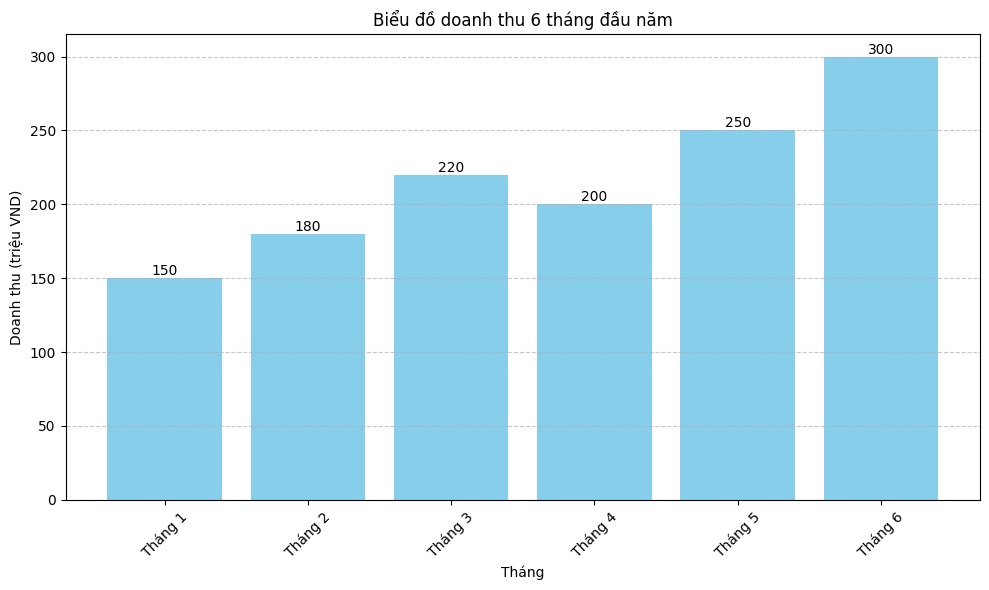

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import io

# 1. Đọc dữ liệu từ chuỗi văn bản
data_string = """Tháng,Doanh thu (triệu VND)
Tháng 1,150
Tháng 2,180
Tháng 3,220
Tháng 4,200
Tháng 5,250
Tháng 6,300
"""

# Sử dụng pandas để đọc dữ liệu dạng CSV từ chuỗi
df = pd.read_csv(io.StringIO(data_string))

# Lấy dữ liệu cho các trục
thang = df['Tháng']
doanh_thu = df['Doanh thu (triệu VND)']

# 2. Tạo biểu đồ
plt.figure(figsize=(10, 6)) # Tạo kích thước biểu đồ hợp lý
bars = plt.bar(thang, doanh_thu, color='skyblue')

# 3. Đặt tên các trục và tiêu đề
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (triệu VND)")
plt.title("Biểu đồ doanh thu 6 tháng đầu năm")
plt.xticks(rotation=45) # Xoay nhãn trục X để dễ đọc
plt.grid(axis='y', linestyle='--', alpha=0.7) # Thêm lưới cho dễ nhìn

# 6. Hiển thị giá trị trên đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center') # va: vertical alignment

# 7. Lưu biểu đồ thành file ảnh
plt.tight_layout() # Tự động điều chỉnh cho vừa vặn
plt.savefig('doanh_thu_thang.png', dpi=300)

print("Đã lưu biểu đồ thành công vào file 'doanh_thu_thang.png'")

In [14]:
import requests
import json

AI_API_BASE = "https://api.thucchien.ai"

chat_url = f"{AI_API_BASE}/chat/completions"
chat_headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}
#  BDBDBD
#  D32F2F

chat_prompt = """
How can i adjust the font name into "Lato"
"""
data = {
    "model": "gemini-2.5-pro",
    "messages": [
        {
            "role": "system",
            "content": "You are a presentation maker. Write a Python script using pptx library to make a slide from user's query"
        },
        {
            "role": "user",
            "content": chat_prompt
        }
  ]
}

response = requests.post(chat_url, headers=chat_headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()
    print(result['choices'][0]['message']['content'])
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Of course! As a presentation maker, I'd be happy to show you how to create a slide and set the font to "Lato" using the `python-pptx` library.

The key to changing font properties is to access the `.font` object of a **"Run"**. A run is a sequence of characters within a paragraph that all have the same formatting.

Here is a complete Python script that:
1.  Creates a new presentation.
2.  Adds a title slide.
3.  Adds text to the title and subtitle.
4.  Iterates through all the text on the slide to change the font name to "Lato".

### The Python Script

```python
# First, make sure you have the library installed:
# pip install python-pptx

from pptx import Presentation
from pptx.util import Inches, Pt

# --- 1. Create a Presentation ---
prs = Presentation()
# Use the 'Title Slide' layout (layout index 0)
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)

# --- 2. Add Text to the Slide ---
# Get the title and subtitle placeholder shapes
title = sl